In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [223]:
#import dataset
df_pos1 = pd.read_csv('./nba_100pos_21-22_clean.csv')
df_pos2 = pd.read_csv('./nba_100pos_20-21_clean.csv')
df_shoot1 = pd.read_csv('./nba_shooting_21-22_clean_for_merge.csv')
df_shoot2 = pd.read_csv('./nba_shooting_20-21_clean_for_merge.csv')


In [224]:
df_shoot2.shape

(705, 10)

In [225]:
df_pos1.shape

(812, 33)

In [226]:
df_shoot1.shape

(812, 10)

In [227]:
df_pos2.shape

(705, 33)

In [228]:
df_shoot2.shape

(705, 10)

In [229]:
df = df_pos1.merge(df_shoot1, on='customID')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,customID,Dist.,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,7.7,17.5,...,Precious AchiuwaTOR,10.2,0.741,0.348,0.274,0.085,0.035,0.259,67,0.429
1,2,Steven Adams,C,28,MEM,76,75,1999,5.0,9.2,...,Steven AdamsMEM,2.9,0.997,0.693,0.260,0.042,0.003,0.003,48,0.000
2,3,Bam Adebayo,C,24,MIA,56,56,1825,11.1,20.0,...,Bam AdebayoMIA,7.0,0.992,0.395,0.309,0.200,0.088,0.008,119,0.000
3,4,Santi Aldama,PF,21,MEM,32,0,360,7.0,17.5,...,Santi AldamaMEM,12.0,0.636,0.333,0.205,0.091,0.008,0.364,10,0.229
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,11.6,21.1,...,LaMarcus AldridgeBRK,12.3,0.900,0.210,0.170,0.240,0.279,0.100,18,0.283


In [230]:
df_gsw = df[df['Tm'] == 'GSW']

In [231]:
df = df.drop_duplicates(subset=['ID'])
df = df.drop(columns=['Rk', 'Age', 'GS','Tm', 'customID', 'ID'])

df

,Player,Pos,G,MP,FG,FGA,FG%,3P_per100,3PA,3P%,...,DRtg,Dist.,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att
0,Precious Achiuwa,C,73,1725,7.7,17.5,0.439,1.6,4.5,0.359,...,110,10.2,0.741,0.348,0.274,0.085,0.035,0.259,67,0.429
1,Steven Adams,C,76,1999,5.0,9.2,0.547,0.0,0.0,0.000,...,108,2.9,0.997,0.693,0.260,0.042,0.003,0.003,48,0.000
2,Bam Adebayo,C,56,1825,11.1,20.0,0.557,0.0,0.2,0.000,...,104,7.0,0.992,0.395,0.309,0.200,0.088,0.008,119,0.000
3,Santi Aldama,PF,32,360,7.0,17.5,0.402,0.8,6.4,0.125,...,111,12.0,0.636,0.333,0.205,0.091,0.008,0.364,10,0.229
4,LaMarcus Aldridge,C,47,1050,11.6,21.1,0.550,0.6,2.1,0.304,...,112,12.3,0.900,0.210,0.170,0.240,0.279,0.100,18,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Thaddeus Young,PF,52,845,8.2,15.8,0.518,1.0,2.8,0.354,...,108,7.7,0.824,0.382,0.393,0.026,0.022,0.176,7,0.604
799,Trae Young,PG,76,2652,13.2,28.6,0.460,4.3,11.3,0.382,...,118,16.5,0.605,0.159,0.204,0.116,0.126,0.395,0,0.048
800,Omer Yurtseven,C,56,706,9.2,17.5,0.526,0.1,0.8,0.091,...,104,5.8,0.955,0.437,0.385,0.113,0.020,0.045,39,0.182
801,Cody Zeller,C,27,355,7.0,12.4,0.567,0.0,0.6,0.000,...,116,3.7,0.956,0.644,0.267,0.033,0.011,0.044,16,0.250


In [232]:
df = df.fillna(0)

<AxesSubplot:xlabel='G', ylabel='Count'>

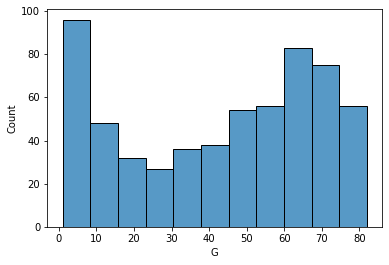

In [233]:
sns.histplot(df['G'])

In [234]:
df = df[df['G']>40]

<AxesSubplot:xlabel='MP', ylabel='Count'>

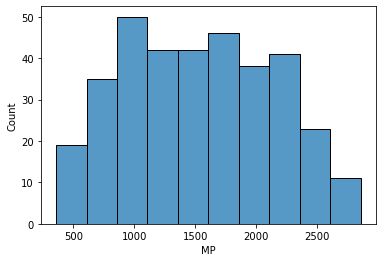

In [235]:
sns.histplot(df['MP'])

In [236]:
df = df.drop(columns=['G', 'MP'])
df.shape

(347, 34)

In [237]:
df2 = df_pos2.merge(df_shoot2, on='customID')

df2 = df2.drop_duplicates(subset=['ID'])
df2 = df2.drop(columns=['Rk', 'Age', 'GS','Tm', 'customID', 'ID'])
df2 = df2.fillna(0)

df2.shape

(540, 36)

In [238]:
df2.head()

,Player,Pos,G,MP,FG,FGA,FG%,3P_per100,3PA,3P%,...,DRtg,Dist.,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att
0,Precious Achiuwa,PF,61,737,8.4,15.4,0.544,0.0,0.1,0.000,...,109,3.3,0.996,0.667,0.263,0.039,0.026,0.004,48,0.000
1,Jaylen Adams,PG,7,18,2.6,20.9,0.125,0.0,5.2,0.000,...,116,11.0,0.750,0.250,0.375,0.125,0.000,0.250,0,0.000
2,Steven Adams,C,58,1605,5.6,9.2,0.614,0.0,0.1,0.000,...,112,3.9,0.990,0.646,0.276,0.068,0.000,0.010,51,0.000
3,Bam Adebayo,C,64,2143,10.6,18.5,0.570,0.0,0.2,0.250,...,108,7.6,0.990,0.353,0.303,0.225,0.110,0.010,137,0.125
4,LaMarcus Aldridge,C,26,674,10.1,21.3,0.473,2.2,5.8,0.388,...,113,15.5,0.730,0.152,0.122,0.152,0.304,0.270,12,0.175


<AxesSubplot:xlabel='G', ylabel='Count'>

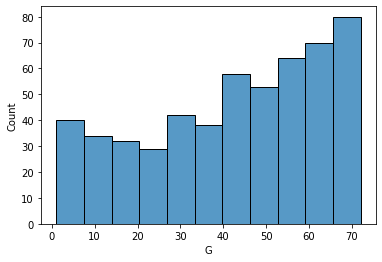

In [239]:
sns.histplot(df2['G'])

In [240]:
df2['G'].max()

72

In [241]:
df2 = df2[df2['G']>36]

df2 = df2.drop(columns=['G', 'MP'])
df2

,Player,Pos,FG,FGA,FG%,3P_per100,3PA,3P%,2P_per100,2PA,...,DRtg,Dist.,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att
0,Precious Achiuwa,PF,8.4,15.4,0.544,0.0,0.1,0.000,8.4,15.3,...,109,3.3,0.996,0.667,0.263,0.039,0.026,0.004,48,0.000
2,Steven Adams,C,5.6,9.2,0.614,0.0,0.1,0.000,5.6,9.1,...,112,3.9,0.990,0.646,0.276,0.068,0.000,0.010,51,0.000
3,Bam Adebayo,C,10.6,18.5,0.570,0.0,0.2,0.250,10.5,18.4,...,108,7.6,0.990,0.353,0.303,0.225,0.110,0.010,137,0.125
8,Nickeil Alexander-Walker,SG,9.1,21.8,0.419,3.6,10.4,0.347,5.5,11.4,...,112,15.5,0.522,0.236,0.164,0.041,0.081,0.478,7,0.283
9,Grayson Allen,SG,6.6,15.7,0.418,4.1,10.4,0.391,2.5,5.3,...,113,19.2,0.338,0.123,0.126,0.070,0.019,0.662,11,0.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,Delon Wright,SG-PG,6.7,14.4,0.463,1.8,4.8,0.372,4.9,9.6,...,113,14.3,0.721,0.220,0.164,0.080,0.257,0.279,5,0.198
701,Thaddeus Young,PF,10.9,19.4,0.559,0.4,1.3,0.267,10.5,18.1,...,110,9.9,0.796,0.382,0.201,0.125,0.088,0.204,22,0.489
702,Trae Young,PG,11.3,25.7,0.438,3.1,9.2,0.343,8.1,16.6,...,116,5.6,0.906,0.584,0.243,0.039,0.041,0.094,0,0.038
703,Cody Zeller,C,8.8,15.7,0.559,0.2,1.4,0.143,8.6,14.4,...,112,21.1,0.216,0.135,0.053,0.016,0.012,0.784,52,0.179


In [242]:
df = pd.concat([df, df2], ignore_index=False, axis=0)
df.head()

,Player,Pos,FG,FGA,FG%,3P_per100,3PA,3P%,2P_per100,2PA,...,DRtg,Dist.,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att
0,Precious Achiuwa,C,7.7,17.5,0.439,1.6,4.5,0.359,6.1,13.0,...,110,10.2,0.741,0.348,0.274,0.085,0.035,0.259,67,0.429
1,Steven Adams,C,5.0,9.2,0.547,0.0,0.0,0.000,5.0,9.2,...,108,2.9,0.997,0.693,0.260,0.042,0.003,0.003,48,0.000
2,Bam Adebayo,C,11.1,20.0,0.557,0.0,0.2,0.000,11.1,19.8,...,104,7.0,0.992,0.395,0.309,0.200,0.088,0.008,119,0.000
4,LaMarcus Aldridge,C,11.6,21.1,0.550,0.6,2.1,0.304,11.0,19.0,...,112,12.3,0.900,0.210,0.170,0.240,0.279,0.100,18,0.283
5,Nickeil Alexander-Walker,SG,8.5,22.9,0.372,3.5,11.4,0.311,5.0,11.5,...,114,15.8,0.503,0.213,0.162,0.071,0.057,0.497,8,0.240


In [243]:
df.shape

(692, 34)

In [244]:
df = df.groupby(['Player','Pos']).mean().reset_index()

In [245]:
df.columns

Index(['Player', 'Pos', 'FG', 'FGA', 'FG%', '3P_per100', '3PA', '3P%',
       '2P_per100', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg', 'Dist.', '2P',
       '0_3', '3_10', '10_16', '16_3P', '3P', 'Dunks', 'corner3_att'],
      dtype='object')

In [246]:
#set features to be used in the k-means clustering model
features = ['FG', 'FGA', 'FG%', '3P_per100', '3PA',
       '3P%', '2P_per100', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg', 'Dist.',
       '2P', '0_3', '3_10', '10_16', '16_3P', '3P', 'Dunks', 'corner3_att']

In [247]:
len(features)

32

In [248]:
#create subset of the df with Food product as the index
df = df.set_index('Player')
select_df = df[features]
select_df

,FG,FGA,FG%,3P_per100,3PA,3P%,2P_per100,2PA,2P%,FT,...,DRtg,Dist.,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,8.60,17.45,0.4915,1.95,5.80,0.3350,6.65,11.65,0.5690,3.45,...,114.0,11.95,0.6255,0.3155,0.2410,0.0420,0.0270,0.3750,91.0,0.3035
Aaron Holiday,7.00,16.85,0.4185,2.30,6.10,0.3735,4.75,10.75,0.4415,2.75,...,114.0,11.30,0.6810,0.3375,0.2330,0.0830,0.0280,0.3190,0.0,0.1625
Aaron Nesmith,5.95,14.40,0.4170,2.80,8.95,0.3200,3.15,5.45,0.5775,1.70,...,111.0,17.55,0.4525,0.1140,0.2090,0.0635,0.0665,0.5475,4.5,0.3905
Aaron Wiggins,6.30,13.60,0.4630,1.70,5.60,0.3040,4.60,8.00,0.5730,2.50,...,116.0,12.70,0.5910,0.2490,0.3180,0.0180,0.0060,0.4090,15.0,0.3620
Al Horford,6.60,14.10,0.4670,2.20,6.60,0.3360,4.40,7.50,0.5820,2.00,...,104.0,15.30,0.5340,0.1700,0.2430,0.0690,0.0530,0.4660,31.0,0.2790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yuta Watanabe,5.30,12.00,0.4390,2.40,6.00,0.4000,2.90,6.00,0.4780,1.60,...,111.0,12.20,0.6670,0.3330,0.2000,0.0000,0.1330,0.3330,13.0,0.4560
Zach LaVine,12.70,25.85,0.4915,4.35,10.70,0.4040,8.40,15.15,0.5525,6.35,...,115.0,12.30,0.6610,0.3700,0.1475,0.0595,0.0850,0.3390,57.5,0.1420
Zeke Nnaji,6.45,13.00,0.4985,2.80,6.45,0.4350,3.65,6.55,0.5675,2.20,...,114.0,12.95,0.5900,0.3375,0.1745,0.0380,0.0400,0.4100,13.0,0.4160


In [249]:
X = StandardScaler().fit_transform(select_df)
y = df['Pos']

In [250]:
# define transform
lda = LinearDiscriminantAnalysis(n_components=2, shrinkage='auto', solver='eigen')

# apply transform to dataset
lda_reduced_df = lda.fit(X,y).transform(X)

In [251]:
lda.score(X,y)

0.6164948453608248

In [252]:
lda.explained_variance_ratio_

array([0.2069034 , 0.20425719])

In [253]:
pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.527664503847936


In [254]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Pos'])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'C': 0, 'C-PF': 1, 'PF': 2, 'PF-C': 3, 'PF-SF': 4, 'PG': 5, 'PG-SG': 6, 'SF': 7, 'SF-PF': 8, 'SF-SG': 9, 'SG': 10, 'SG-PG': 11, 'SG-SF': 12}


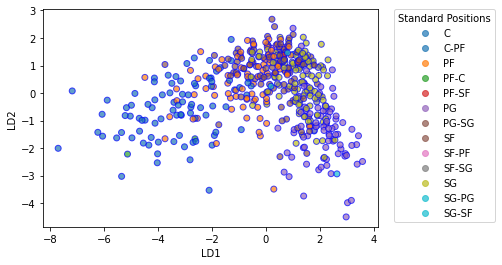

In [255]:

plt.xlabel('LD1')
plt.ylabel('LD2')
scatter=plt.scatter(
    lda_reduced_df[:,0],
    lda_reduced_df[:,1],
    c=y,
    cmap='tab10',
    alpha=0.7,
    edgecolors='b'
)

# add legend to the plot with names
plt.legend(handles=scatter.legend_elements()[0], 
           title="Standard Positions", labels=le_name_mapping,
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

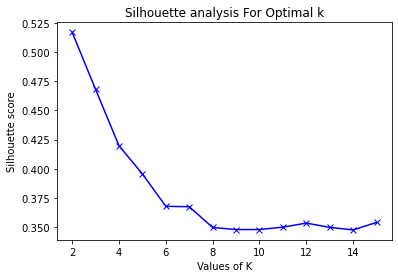

In [256]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    kmeans = KMeans(n_clusters=num_clusters, random_state=2)
    kmeans.fit(lda_reduced_df)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(lda_reduced_df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Text(0, 0.5, 'WSSE')

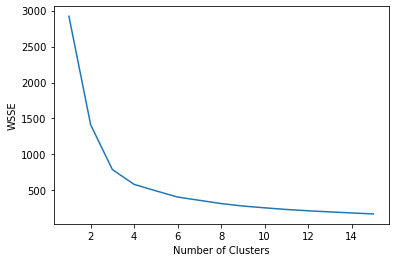

In [257]:
#create elbow plot of WSSE to select value for k
numClusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
WSSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(lda_reduced_df)
    WSSE.append(k_means.inertia_)

plt.plot(numClusters, WSSE)
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')

In [258]:
#using k-means clustering model
kmeans = KMeans(n_clusters=7, random_state=2)
model = kmeans.fit(lda_reduced_df)

In [259]:
# Assign labels
df['cluster'] = model.predict(lda_reduced_df)

# Print silhouette score
#print("silhouette score:", model['silhouette_score'])
silhouette_score(lda_reduced_df, df['cluster'])

0.36765026631920134

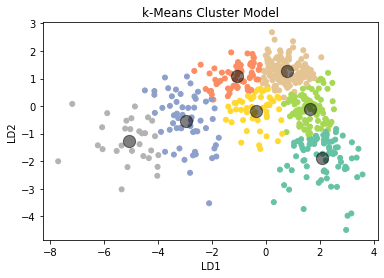

In [260]:
centers = model.cluster_centers_
plt.scatter(lda_reduced_df[:, 0], lda_reduced_df[:, 1], c=df['cluster'], s=25, cmap='Set2')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5)
plt.title('k-Means Cluster Model')

plt.show()

In [261]:
df = df.reset_index()
df.head()

,Player,Pos,FG,FGA,FG%,3P_per100,3PA,3P%,2P_per100,2PA,...,Dist.,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att,cluster
0,Aaron Gordon,PF,8.60,17.45,0.4915,1.95,5.80,0.3350,6.65,11.65,...,11.95,0.6255,0.3155,0.241,0.0420,0.0270,0.3750,91.0,0.3035,4
1,Aaron Holiday,PG,7.00,16.85,0.4185,2.30,6.10,0.3735,4.75,10.75,...,11.30,0.6810,0.3375,0.233,0.0830,0.0280,0.3190,0.0,0.1625,3
2,Aaron Nesmith,SF,5.95,14.40,0.4170,2.80,8.95,0.3200,3.15,5.45,...,17.55,0.4525,0.1140,0.209,0.0635,0.0665,0.5475,4.5,0.3905,1
3,Aaron Wiggins,SG,6.30,13.60,0.4630,1.70,5.60,0.3040,4.60,8.00,...,12.70,0.5910,0.2490,0.318,0.0180,0.0060,0.4090,15.0,0.3620,5
4,Al Horford,C,6.60,14.10,0.4670,2.20,6.60,0.3360,4.40,7.50,...,15.30,0.5340,0.1700,0.243,0.0690,0.0530,0.4660,31.0,0.2790,2


In [262]:
def feature_importance(cluster_data, league_data):
    """
    takes reduced data,
    performs Principal Component Analysis,
    returns feature importance dataframe
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)

    pca = PCA(n_components=2)
    PCA_reduced_df = pca.fit(scaled_data).transform(scaled_data)

    features = pd.DataFrame(zip(cluster_data.columns, pca.components_[0], np.mean(cluster_data), np.mean(league_data)),
        columns=['Feature', 'Importance', 'Cluster Average', 'League Average']).sort_values('Importance', ascending=False).head(10)

    return features


## Cluster 0

In [263]:
mask = (df['cluster'] == 0)
df[mask][['Player','Pos','PTS']].sort_values(by='PTS',ascending=False).head(10)

,Player,Pos,PTS
313,Luka Don?i?,PG,40.15
427,Stephen Curry,PG,39.95
80,Damian Lillard,PG,39.20
124,Donovan Mitchell,PG,38.50
451,Trae Young,PG,38.40
125,Donovan Mitchell,SG,37.80
297,Kyrie Irving,PG,37.10
308,LeBron James,PG,36.40
101,DeMar DeRozan,PF,34.40
422,Shai Gilgeous-Alexander,PG,34.40


In [264]:
cluster_data = df[mask].drop(['Player', 'Pos', 'cluster'], axis=1)
league_data = df.drop(['Player', 'Pos', 'cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

# Ball-handling scoring guard

,Feature,Importance,Cluster Average,League Average
0,PTS,0.351027,24.422368,21.255464
1,FG,0.347993,8.851316,7.833196
2,FGA,0.324778,19.978289,16.956701
3,FTA,0.307690,4.999342,4.086907
4,2P_per100,0.305713,6.167763,5.387732
5,FT,0.301291,4.046711,3.138969
6,2PA,0.289412,12.407237,10.087938
7,TOV,0.207464,3.659211,2.512165
8,2P%,0.165005,0.492974,0.531284
9,FG%,0.161334,0.441645,0.465254


## Cluster 1

In [265]:
mask = (df['cluster'] == 1)
df[mask][['Player','Pos','PTS']].sort_values(by='PTS',ascending=False).head(10)

,Player,Pos,PTS
284,Kevin Love,C,30.20
333,Michael Porter Jr.,SF,30.00
65,Christian Wood,C,29.20
336,Mike Muscala,C,28.30
240,Jonathan Kuminga,SF,26.80
305,Lauri Markkanen,PF,25.60
457,Trey Lyles,PF,24.80
173,Hamidou Diallo,SG,24.50
324,Marvin Bagley III,PF,24.50
344,Moritz Wagner,C,24.35


In [266]:
cluster_data = df[mask].drop(['Player', 'Pos', 'cluster'], axis=1)
league_data = df.drop(['Player', 'Pos', 'cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

# inside scoring forward

,Feature,Importance,Cluster Average,League Average
0,2P_per100,0.316936,4.832258,5.387732
1,2PA,0.304798,8.652419,10.087938
2,FG%,0.252890,0.466363,0.465254
3,2P,0.249610,0.594427,0.595043
4,FTA,0.230939,3.616935,4.086907
5,FG,0.229043,7.129839,7.833196
6,Dunks,0.210211,32.217742,25.330928
7,FT,0.206274,2.669355,3.138969
8,0_3,0.204548,0.304855,0.268116
9,ORB,0.186043,2.536290,2.090103


## Cluster 2

In [267]:
mask = (df['cluster'] == 2)
df[mask][['Player','Pos','PTS']].sort_values(by='PTS',ascending=False).head(10)

,Player,Pos,PTS
235,Joel Embiid,C,44.60
165,Giannis Antetokounmpo,PF,41.85
362,Nikola Joki?,C,38.70
292,Kristaps Porzi??is,PF,34.80
266,Karl-Anthony Towns,C,34.75
291,Kristaps Porzi??is,C,32.10
363,Nikola Vu?evi?,C,29.95
213,Jaren Jackson Jr.,PF,28.60
26,Bam Adebayo,C,28.50
343,Montrezl Harrell,C,28.25


In [268]:
cluster_data = df[mask].drop(['Player', 'Pos', 'cluster'], axis=1)
league_data = df.drop(['Player', 'Pos', 'cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

# Offensive bigs

,Feature,Importance,Cluster Average,League Average
0,FGA,0.293420,16.307143,16.956701
1,PTS,0.281210,22.799107,21.255464
2,FG,0.268518,8.712500,7.833196
3,2PA,0.220372,12.846429,10.087938
4,3PA,0.217651,3.461607,6.871649
5,Dist.,0.213783,10.848214,13.765464
6,FT,0.211064,4.200893,3.138969
7,3P_per100,0.211033,1.177679,2.449175
8,FT%,0.210865,0.719143,0.766652
9,2P_per100,0.190926,7.534821,5.387732


## Cluster 3

In [269]:
mask = (df['cluster'] == 3)
df[mask][['Player','Pos','PTS']].sort_values(by='PTS',ascending=False).head(10)

,Player,Pos,PTS
38,Bradley Beal,SG,40.30
117,Devin Booker,SG,37.30
481,Zach LaVine,SG,36.10
42,Brandon Ingram,SF,33.05
241,Jordan Clarkson,SG,31.35
244,Jordan Poole,SG,29.55
207,Jamal Murray,PG,29.50
18,Anthony Edwards,SG,29.00
462,Tyler Herro,SG,28.30
440,Terry Rozier,SG,28.15


In [270]:
cluster_data = df[mask].drop(['Player', 'Pos', 'cluster'], axis=1)
league_data = df.drop(['Player', 'Pos', 'cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

# Versatile Guards

,Feature,Importance,Cluster Average,League Average
0,FG,0.341606,8.068235,7.833196
1,PTS,0.340264,22.167059,21.255464
2,2PA,0.331167,9.738235,10.087938
3,2P_per100,0.330864,4.840000,5.387732
4,FT,0.323227,2.791176,3.138969
5,FTA,0.314323,3.411176,4.086907
6,FGA,0.307692,18.615882,16.956701
7,TOV,0.199372,2.589412,2.512165
8,Dunks,0.194834,10.035294,25.330928
9,10_16,0.186568,0.091506,0.080735


## Cluster 4

In [271]:
mask = (df['cluster'] == 4)
df[mask][['Player','Pos','PTS']].sort_values(by='PTS',ascending=False).head(15)

,Player,Pos,PTS
484,Zion Williamson,PF,39.00
307,LeBron James,PF,39.00
280,Kevin Durant,PF,38.90
222,Jayson Tatum,SF,36.65
267,Kawhi Leonard,SF,36.10
220,Jaylen Brown,SG,34.90
384,Paul George,SF,34.20
226,Jerami Grant,SF,32.30
260,Julius Randle,PF,30.30
376,Pascal Siakam,PF,29.50


In [272]:
cluster_data = df[mask].drop(['Player', 'Pos', 'cluster'], axis=1)
league_data = df.drop(['Player', 'Pos', 'cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

# scoring-playmaker wing

,Feature,Importance,Cluster Average,League Average
0,PTS,0.309941,22.274510,21.255464
1,FGA,0.298989,17.598039,16.956701
2,FG,0.293308,8.287255,7.833196
3,FT,0.292481,3.535294,3.138969
4,FTA,0.278302,4.684314,4.086907
5,2PA,0.253826,11.399020,10.087938
6,2P_per100,0.241447,6.126471,5.387732
7,TOV,0.213250,2.812745,2.512165
8,AST,0.195568,5.097059,4.589381
9,FT%,0.189035,0.737422,0.766652


## Cluster 5

In [273]:
mask = (df['cluster'] == 5)
df[mask][['Player','Pos','PTS']].sort_values(by='PTS',ascending=False).head(15)

,Player,Pos,PTS
219,Jaylen Brown,SF,34.90
225,Jerami Grant,PF,29.40
393,RJ Barrett,SF,29.00
34,Bojan Bogdanovi?,PF,28.90
364,Norman Powell,SF-SG,28.60
365,Norman Powell,SG-SF,28.30
35,Bojan Bogdanovi?,SF,26.90
444,Tim Hardaway Jr.,SG,26.55
16,Andrew Wiggins,SF,26.30
15,Andrew Wiggins,PF,26.20


In [274]:
cluster_data = df[mask].drop(['Player', 'Pos', 'cluster'], axis=1)
league_data = df.drop(['Player', 'Pos', 'cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

# versatile wing

,Feature,Importance,Cluster Average,League Average
0,2PA,0.334505,7.148016,10.087938
1,2P_per100,0.330870,3.672619,5.387732
2,FG,0.304447,6.689286,7.833196
3,FTA,0.303858,3.025000,4.086907
4,FT,0.295082,2.376587,3.138969
5,PTS,0.291893,18.788492,21.255464
6,FGA,0.277418,15.523810,16.956701
7,TOV,0.251946,1.821032,2.512165
8,2P,0.223382,0.490944,0.595043
9,Dunks,0.184131,15.242063,25.330928


## Cluster 6

In [275]:
mask = (df['cluster'] == 6)
df[mask][['Player','Pos','PTS']].sort_values(by='PTS',ascending=False).head(15)

,Player,Pos,PTS
239,Jonas Valan?i?nas,C,28.90
194,JaVale McGee,C,26.20
104,Deandre Ayton,C,25.65
478,Willy Hernang�mez,C,23.70
13,Andre Drummond,C,23.50
410,Rudy Gobert,C,23.25
83,Daniel Gafford,C,23.20
84,Daniel Gafford,PF-C,22.70
177,Hassan Whiteside,C,22.70
140,Enes Freedom,C,22.40


In [276]:
cluster_data = df[mask].drop(['Player', 'Pos', 'cluster'], axis=1)
league_data = df.drop(['Player', 'Pos', 'cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

# defensive centers

,Feature,Importance,Cluster Average,League Average
0,Dist.,0.293345,8.053448,13.765464
1,3P_per100,0.270943,0.315517,2.449175
2,3PA,0.270148,0.994828,6.871649
3,3P,0.263324,0.164414,0.396711
4,3P%,0.239510,0.156586,0.329230
5,AST,0.188452,2.594828,4.589381
6,TOV,0.158585,2.618966,2.512165
7,PF,0.157080,5.894828,4.073196
8,FGA,0.141469,14.239655,16.956701
9,10_16,0.121333,0.066983,0.080735


In [277]:
cluster_df = pd.DataFrame({'X1':lda_reduced_df[:,0],'X2':lda_reduced_df[:,1], 'labels':df['cluster']})

cluster_df['Player'] = df['Player']

cluster_df['labels'] = df['cluster'].map({0: 'Ball-handling Scorer',
                                 1: 'Inside Scoring Forward',
                                 2: 'Offensive Big',
                                 3: 'Versatile Guard',
                                 4: 'Scoring-Playmaker Wing',
                                 5: 'Versatile Wings',
                                 6: 'Defensive Centers'})

cluster_df.head()

,X1,X2,labels,Player
0,-0.457319,0.334469,Scoring-Playmaker Wing,Aaron Gordon
1,2.305247,-0.861259,Versatile Guard,Aaron Holiday
2,-0.491982,1.892656,Inside Scoring Forward,Aaron Nesmith
3,0.402995,1.174301,Versatile Wings,Aaron Wiggins
4,-2.216342,-0.800899,Offensive Big,Al Horford


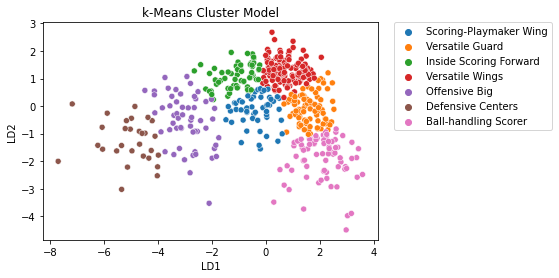

In [278]:
sns.scatterplot('X1', 'X2', data=cluster_df, hue='labels')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('k-Means Cluster Model')
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.show()

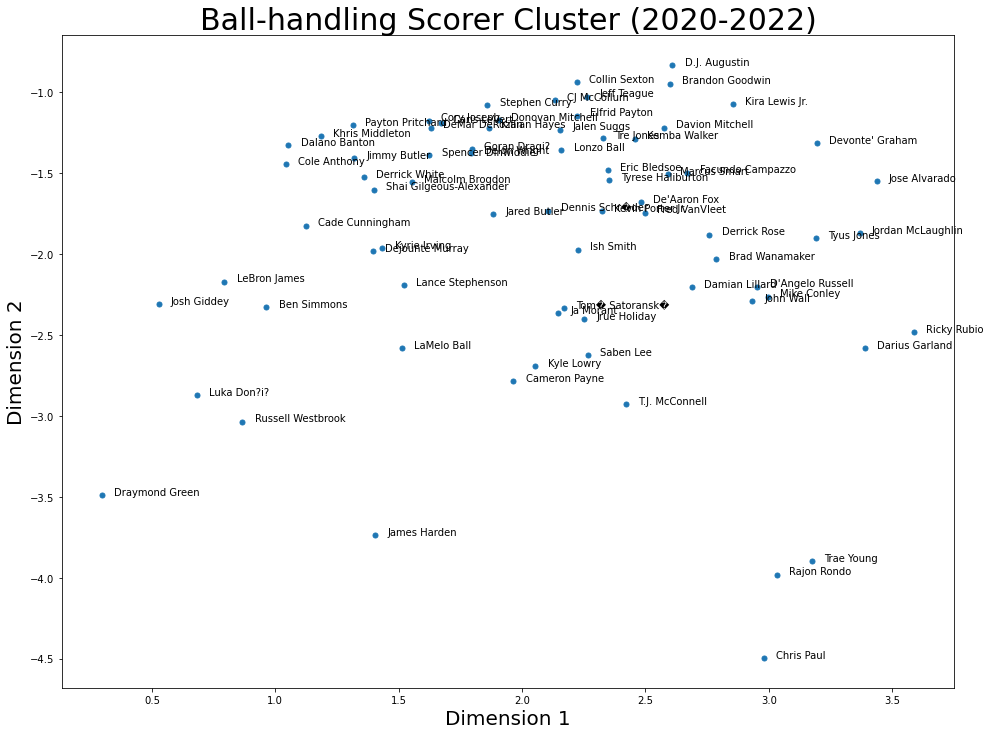

In [279]:
df_ps = cluster_df[cluster_df['labels']=='Ball-handling Scorer'].drop_duplicates(subset='Player', keep='first')


plt.figure(figsize=(16,12))
plt.scatter('X1', 'X2', s=25, data = df_ps)


# Annotate each data point
for i, txt in enumerate(df_ps.Player):
    plt.annotate(txt, (df_ps.X1.iat[i]+0.05, df_ps.X2.iat[i]),fontsize=10)
plt.title('Ball-handling Scorer Cluster (2020-2022)',fontsize=30)
plt.xlabel('Dimension 1',fontsize=20)
plt.ylabel('Dimension 2',fontsize=20)
plt.show()

In [280]:
df_ps

,X1,X2,labels,Player
28,0.963206,-2.328789,Ball-handling Scorer,Ben Simmons
37,2.787869,-2.030006,Ball-handling Scorer,Brad Wanamaker
41,2.599686,-0.946997,Ball-handling Scorer,Brandon Goodwin
49,2.133409,-1.050619,Ball-handling Scorer,CJ McCollum
50,1.124860,-1.823744,Ball-handling Scorer,Cade Cunningham
...,...,...,...,...
447,2.170397,-2.335934,Ball-handling Scorer,Tom� Satoransk�
451,3.173289,-3.897279,Ball-handling Scorer,Trae Young
452,2.326711,-1.284253,Ball-handling Scorer,Tre Jones
464,2.351249,-1.542823,Ball-handling Scorer,Tyrese Haliburton


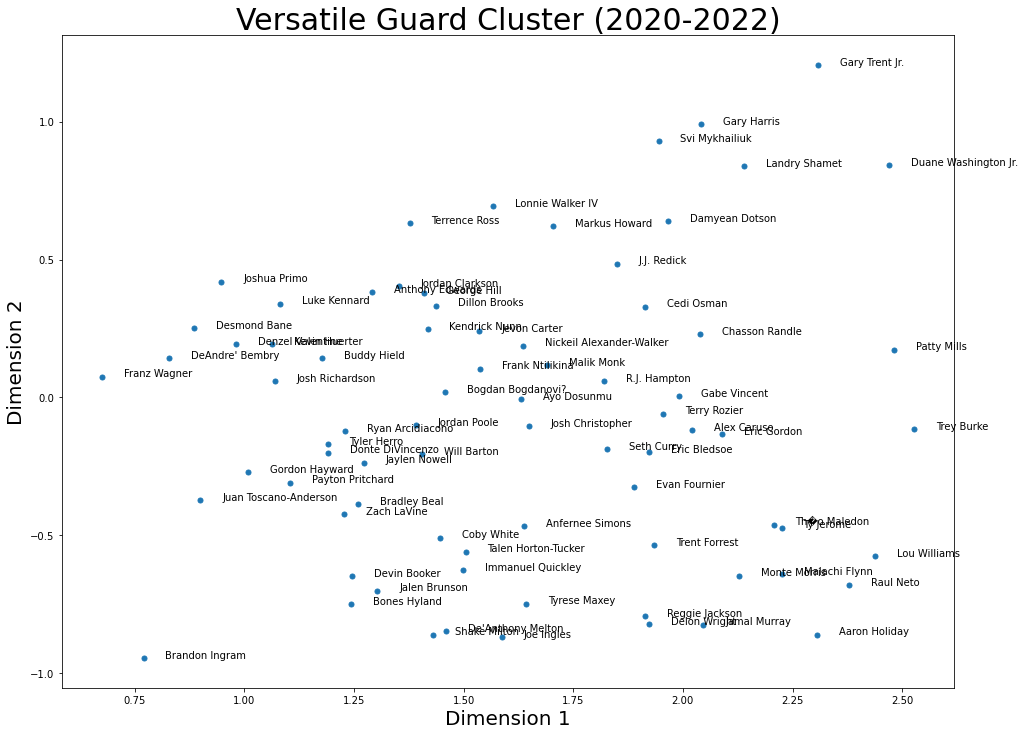

In [281]:
df_vg = cluster_df[cluster_df['labels']=='Versatile Guard'].drop_duplicates(subset='Player', keep='first')

# ax = sns.scatterplot('X1', 'X2', data=df_vg)
# sns.set(rc={'figure.figsize':(40,30)})

plt.figure(figsize=(16,12))
plt.scatter('X1', 'X2', s=25, data = df_vg)

# Annotate each data point
for i, txt in enumerate(df_vg.Player):
    plt.annotate(txt, (df_vg.X1.iat[i]+0.05, df_vg.X2.iat[i]),fontsize=10)
    
plt.title('Versatile Guard Cluster (2020-2022)',fontsize=30)
plt.xlabel('Dimension 1',fontsize=20)
plt.ylabel('Dimension 2',fontsize=20)

plt.show()

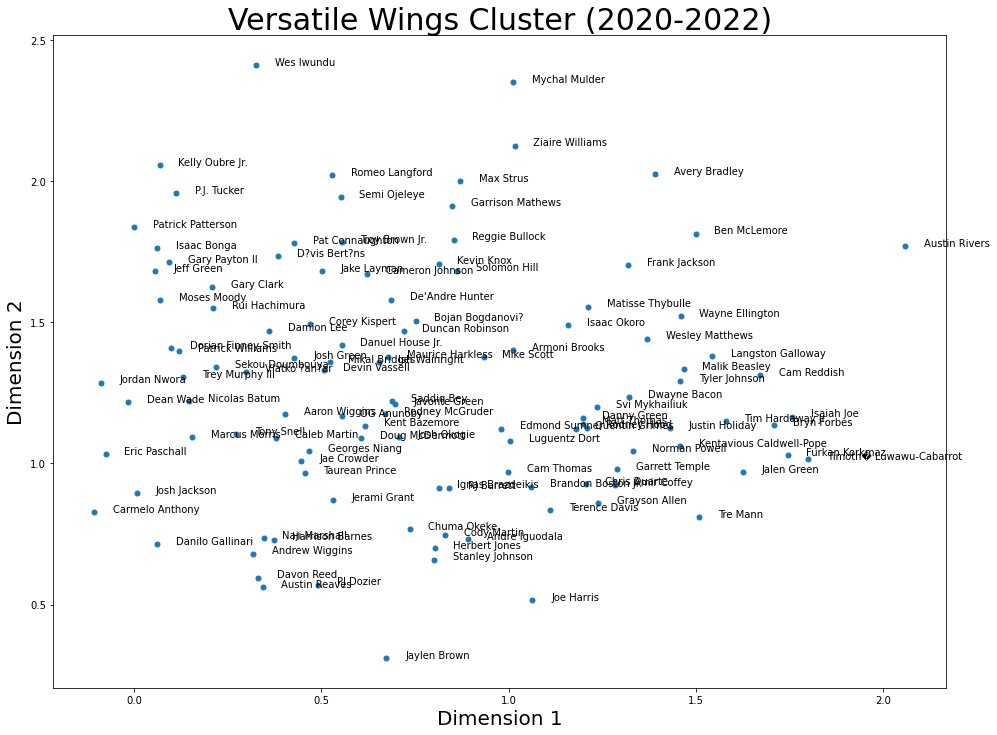

In [282]:
df_vw = cluster_df[cluster_df['labels']=='Versatile Wings'].drop_duplicates(subset='Player', keep='first')

# ax = sns.scatterplot('X1', 'X2', data=df_vw)
# sns.set(rc={'figure.figsize':(40,30)})

plt.figure(figsize=(16,12))
plt.scatter('X1', 'X2', s=25, data = df_vw)

# Annotate each data point
for i, txt in enumerate(df_vw.Player):
    plt.annotate(txt, (df_vw.X1.iat[i]+0.05, df_vw.X2.iat[i]),fontsize=10)
    
plt.title('Versatile Wings Cluster (2020-2022)',fontsize=30)
plt.xlabel('Dimension 1',fontsize=20)
plt.ylabel('Dimension 2',fontsize=20)

plt.show()

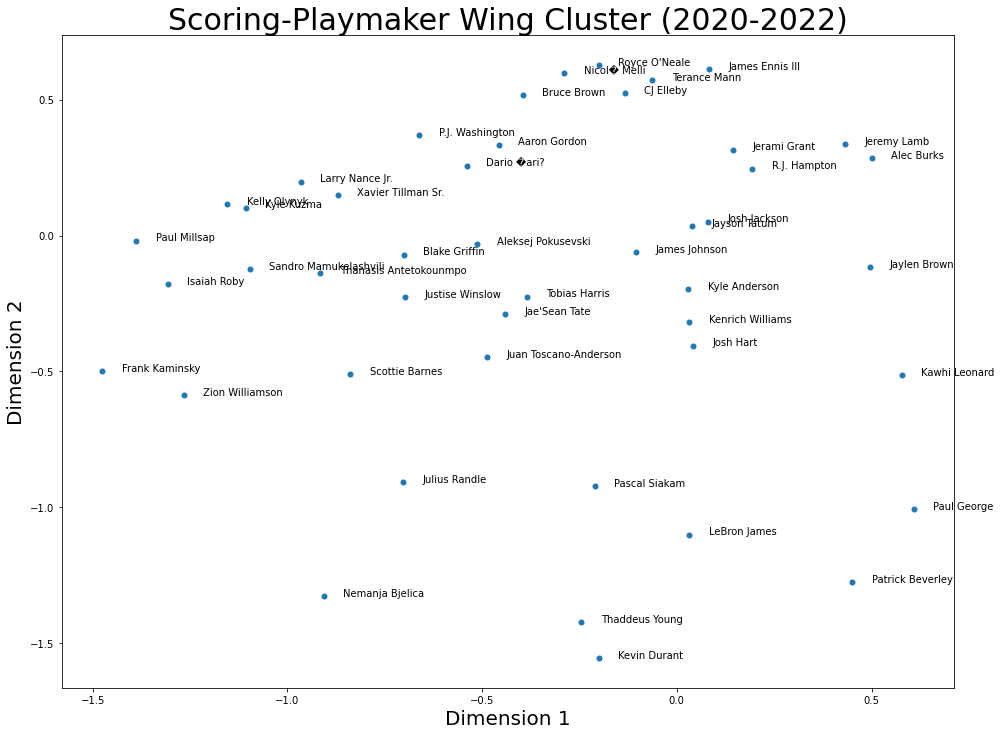

In [283]:
df_sp = cluster_df[cluster_df['labels']=='Scoring-Playmaker Wing'].drop_duplicates(subset='Player', keep='first')

plt.figure(figsize=(16,12))
plt.scatter('X1', 'X2', s=25, data = df_sp)

# Annotate each data point
for i, txt in enumerate(df_sp.Player):
    plt.annotate(txt, (df_sp.X1.iat[i]+0.05, df_sp.X2.iat[i]),fontsize=10)
    
plt.title('Scoring-Playmaker Wing Cluster (2020-2022)',fontsize=30)
plt.xlabel('Dimension 1',fontsize=20)
plt.ylabel('Dimension 2',fontsize=20)

plt.show()

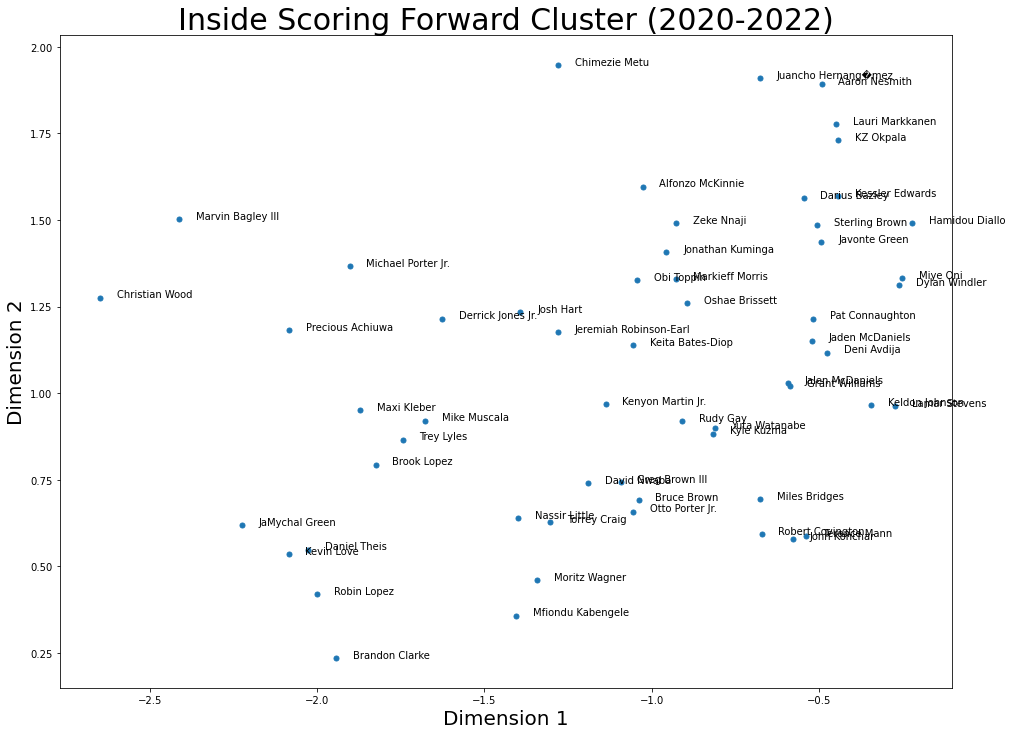

In [284]:
df_sf = cluster_df[cluster_df['labels']=='Inside Scoring Forward'].drop_duplicates(subset='Player', keep='first')

plt.figure(figsize=(16,12))
plt.scatter('X1', 'X2', s=25, data = df_sf)

# Annotate each data point
for i, txt in enumerate(df_sf.Player):
    plt.annotate(txt, (df_sf.X1.iat[i]+0.05, df_sf.X2.iat[i]),fontsize=10)
    
plt.title('Inside Scoring Forward Cluster (2020-2022)',fontsize=30)
plt.xlabel('Dimension 1',fontsize=20)
plt.ylabel('Dimension 2',fontsize=20)

plt.show()

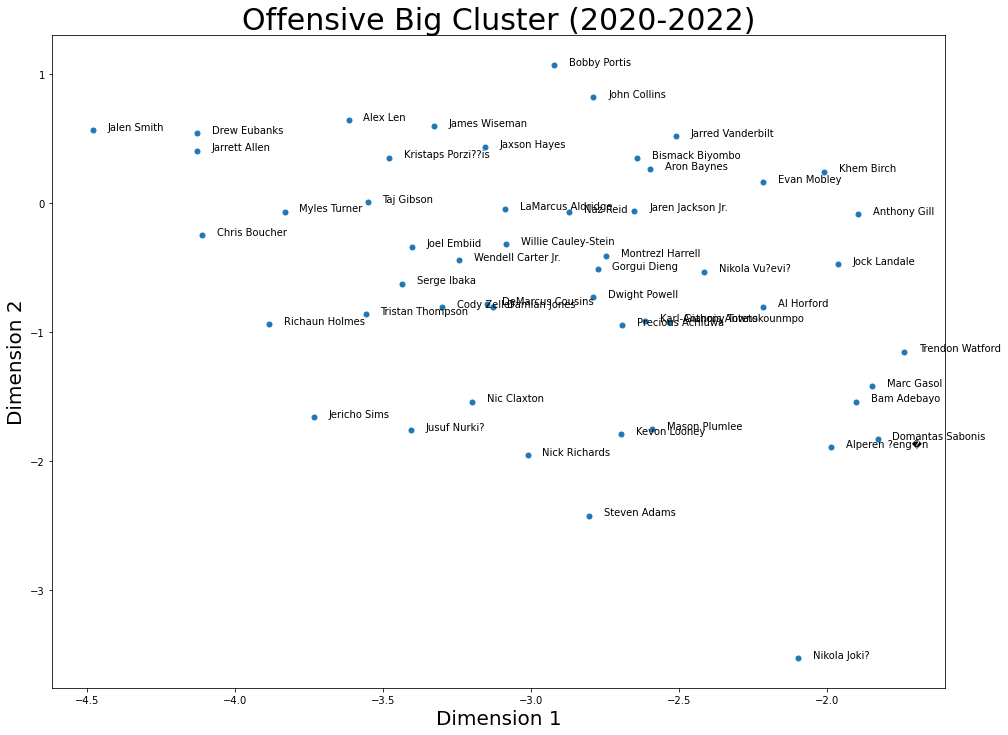

In [285]:
df_ob = cluster_df[cluster_df['labels']=='Offensive Big'].drop_duplicates(subset='Player', keep='first')

plt.figure(figsize=(16,12))
plt.scatter('X1', 'X2', s=25, data = df_ob)

# Annotate each data point
for i, txt in enumerate(df_ob.Player):
    plt.annotate(txt, (df_ob.X1.iat[i]+0.05, df_ob.X2.iat[i]),fontsize=10)

plt.title('Offensive Big Cluster (2020-2022)',fontsize=30)
plt.xlabel('Dimension 1',fontsize=20)
plt.ylabel('Dimension 2',fontsize=20)


plt.show()

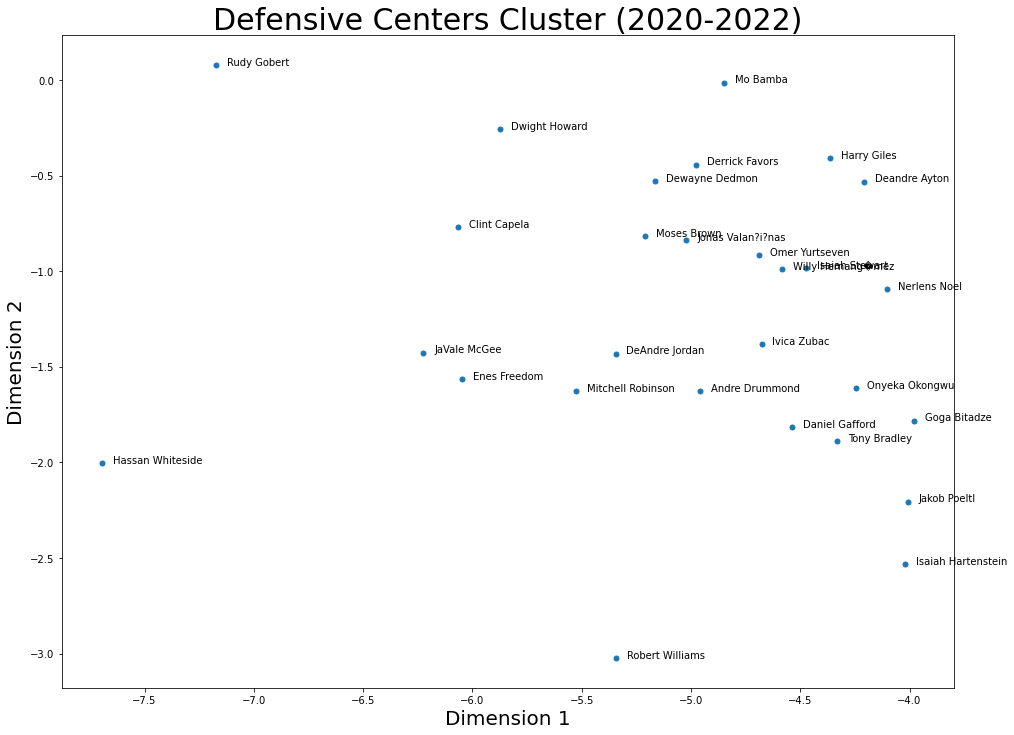

In [286]:
df_dc = cluster_df[cluster_df['labels']=='Defensive Centers'].drop_duplicates(subset='Player', keep='first')

plt.figure(figsize=(16,12))
plt.scatter('X1', 'X2', s=25, data = df_dc)

# Annotate each data point
for i, txt in enumerate(df_dc.Player):
    plt.annotate(txt, (df_dc.X1.iat[i]+0.05, df_dc.X2.iat[i]),fontsize=10)

plt.title('Defensive Centers Cluster (2020-2022)',fontsize=30)
plt.xlabel('Dimension 1',fontsize=20)
plt.ylabel('Dimension 2',fontsize=20)

plt.show()

In [295]:
cluster_df[cluster_df['Player'] =='Kevon Looney']

,X1,X2,labels,Player
286,-2.694941,-1.78951,Offensive Big,Kevon Looney


In [287]:
# df_gsw = df_gsw.fillna(0)

# #create subset of the df with Food product as the index
# df_gsw = df_gsw.set_index('Player')

# select_df2 = df_gsw[features]
# select_df2

,FG,FGA,FG%,3P_per100,3PA,3P%,2P_per100,2PA,2P%,FT,...,DRtg,Dist.,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att
Player,,,,,,,,,,,,,,,,,,,,,
Nemanja Bjelica,6.8,14.6,0.468,2.3,6.4,0.362,4.5,8.2,0.549,2.5,...,105,14.1,0.564,0.260,0.260,0.023,0.020,0.436,9,0.128
Chris Chiozza,3.1,10.6,0.296,2.2,6.9,0.321,0.9,3.7,0.250,0.3,...,110,19.4,0.346,0.111,0.136,0.049,0.049,0.654,0,0.245
Stephen Curry,11.8,27.0,0.437,6.3,16.5,0.380,5.5,10.5,0.527,6.1,...,108,19.8,0.387,0.120,0.134,0.062,0.071,0.613,0,0.091
Jeff Dowtin,5.2,10.4,0.500,0.0,1.7,0.000,5.2,8.7,0.600,0.0,...,108,13.8,0.833,0.000,0.333,0.167,0.333,0.167,0,1.000
Draymond Green,5.0,9.4,0.525,0.6,2.0,0.296,4.4,7.4,0.586,2.2,...,103,9.8,0.790,0.315,0.377,0.058,0.039,0.210,21,0.222
Andre Iguodala,3.7,9.8,0.380,1.4,6.0,0.230,2.3,3.8,0.617,1.2,...,106,18.1,0.388,0.207,0.116,0.025,0.041,0.612,17,0.338
Jonathan Kuminga,9.7,18.9,0.513,2.1,6.1,0.336,7.7,12.8,0.598,5.3,...,108,11.0,0.676,0.341,0.276,0.043,0.015,0.324,74,0.349
Damion Lee,6.6,14.9,0.441,2.4,7.3,0.337,4.1,7.6,0.541,2.6,...,109,16.4,0.512,0.188,0.146,0.091,0.086,0.488,2,0.396
Kevon Looney,5.9,10.2,0.571,0.0,0.0,0.000,5.9,10.2,0.573,2.1,...,105,4.6,0.997,0.541,0.308,0.066,0.082,0.003,83,0.000


In [288]:
# X = StandardScaler().fit_transform(select_df2)
# y = df_gsw['Pos']

In [289]:
# # define transform
# lda = LinearDiscriminantAnalysis(n_components=2, shrinkage='auto', solver='eigen')

# # apply transform to dataset
# lda_reduced_df = lda.fit(X,y).transform(X)

In [290]:
#using k-means clustering model
# kmeans = KMeans(n_clusters=7, random_state=2)
# model = kmeans.fit(lda_reduced_df)

In [291]:
# Assign labels
# df_gsw['cluster'] = model.predict(lda_reduced_df)

# # Print silhouette score
# #print("silhouette score:", model['silhouette_score'])
# silhouette_score(lda_reduced_df, df['cluster'])

In [292]:
# df_gsw = df_gsw.reset_index()
# df_gsw.head()

,Player,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Dist.,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att,cluster
0,Nemanja Bjelica,51,C,33,GSW,71,0,1142,6.8,14.6,...,14.1,0.564,0.260,0.260,0.023,0.020,0.436,9,0.128,1
1,Chris Chiozza,102,PG,26,GSW,34,1,372,3.1,10.6,...,19.4,0.346,0.111,0.136,0.049,0.049,0.654,0,0.245,2
2,Stephen Curry,126,PG,33,GSW,64,64,2211,11.8,27.0,...,19.8,0.387,0.120,0.134,0.062,0.071,0.613,0,0.091,2
3,Jeff Dowtin,147,PG,24,GSW,4,0,28,5.2,10.4,...,13.8,0.833,0.000,0.333,0.167,0.333,0.167,0,1.000,2
4,Draymond Green,204,PF,31,GSW,46,44,1329,5.0,9.4,...,9.8,0.790,0.315,0.377,0.058,0.039,0.210,21,0.222,3


In [293]:
# df_gsw['labels'] = df_gsw['cluster'].map({0: 'Ball-handling Scorer',
#                                  1: 'Inside Scoring Forward',
#                                  2: 'Offensive Big',
#                                  3: 'Versatile Guard',
#                                  4: 'Scoring-Playmaker Wing',
#                                  5: 'Versatile Wings',
#                                  6: 'Defensive Centers'})

# df_gsw

,Player,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,...,2P,0_3,3_10,10_16,16_3P,3P,Dunks,corner3_att,cluster,labels
0,Nemanja Bjelica,51,C,33,GSW,71,0,1142,6.8,14.6,...,0.564,0.260,0.260,0.023,0.020,0.436,9,0.128,1,Inside Scoring Forward
1,Chris Chiozza,102,PG,26,GSW,34,1,372,3.1,10.6,...,0.346,0.111,0.136,0.049,0.049,0.654,0,0.245,2,Offensive Big
2,Stephen Curry,126,PG,33,GSW,64,64,2211,11.8,27.0,...,0.387,0.120,0.134,0.062,0.071,0.613,0,0.091,2,Offensive Big
3,Jeff Dowtin,147,PG,24,GSW,4,0,28,5.2,10.4,...,0.833,0.000,0.333,0.167,0.333,0.167,0,1.000,2,Offensive Big
4,Draymond Green,204,PF,31,GSW,46,44,1329,5.0,9.4,...,0.790,0.315,0.377,0.058,0.039,0.210,21,0.222,3,Versatile Guard
5,Andre Iguodala,263,SF,38,GSW,31,0,603,3.7,9.8,...,0.388,0.207,0.116,0.025,0.041,0.612,17,0.338,5,Versatile Wings
6,Jonathan Kuminga,318,SF,19,GSW,70,12,1185,9.7,18.9,...,0.676,0.341,0.276,0.043,0.015,0.324,74,0.349,5,Versatile Wings
7,Damion Lee,326,SG,29,GSW,63,5,1256,6.6,14.9,...,0.512,0.188,0.146,0.091,0.086,0.488,2,0.396,0,Ball-handling Scorer
8,Kevon Looney,335,C,25,GSW,82,80,1732,5.9,10.2,...,0.997,0.541,0.308,0.066,0.082,0.003,83,0.000,6,Defensive Centers
9,Moses Moody,387,SG,19,GSW,52,11,607,6.4,14.7,...,0.399,0.213,0.082,0.049,0.055,0.601,11,0.336,0,Ball-handling Scorer
